DATASET      Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agua Grande  1876   
1                      A. Morin                             Kpime  1676   
2                      A. Morin                            Atsane  1676   
3                      A. Morin                             Akata  1680   
4                      A. Morin                            Quilla  1704   
...                         ...                               ...   ...   
1790                     Zotter                              Peru   647   
1791                     Zotter                             Congo   749   
1792                     Zotter                      Kerala State   749   
1793                     Zotter                      Kerala State   781   
1794                     Zotter                Brazil, Mitzi Blue   486   

      Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0             201

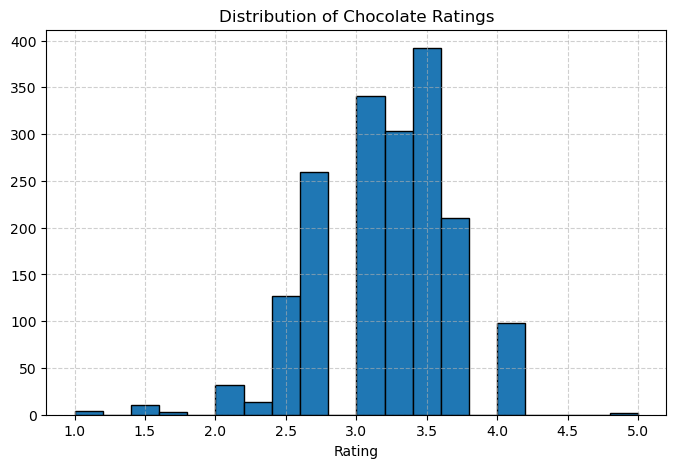

Rating statistics:
count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

COCOA PERCENT COLUMN:
0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: Cocoa\nPercent, Length: 1795, dtype: object
0    63.0
1    70.0
2    70.0
3    70.0
4    70.0
Name: Cocoa\nPercent, dtype: float64


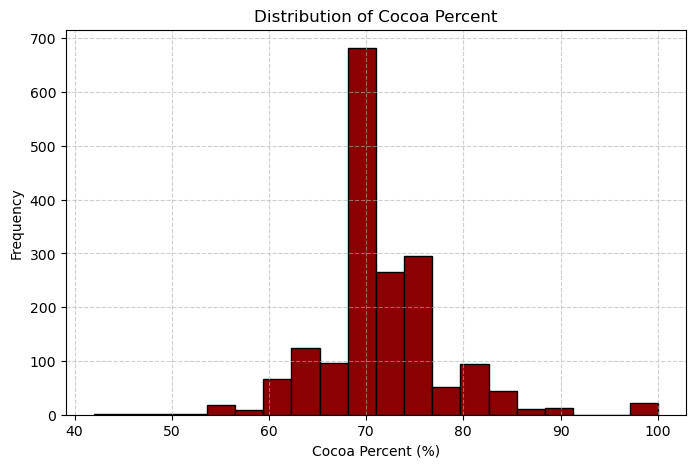

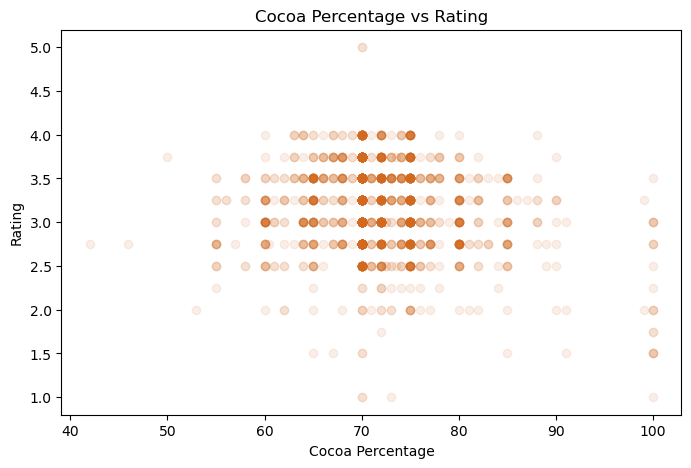


RATING COLUMN:
0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64
Rating statistics:
count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

RATING COLUMN WITH NORMALIZATION:
   Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate  Cocoa\nPercent Company\nLocation    Rating Bean\nType  \
0          2016            63.0        

In [ ]:
def main():

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    
   # STEP 1: Download the Dataset
    
    dataset = pd.read_csv('flavors_of_cacao.csv')    
    print("DATASET", dataset)
    print("DATASET INFO", dataset.info())

    # STEP 2: Reading the Dataset
    # Step 2a: Create a boolean DataFrame showing missing values (True/False)
    missing_mask = dataset.isna()
    print("BOOLEAN MISSING VALUE MASK:")
    print(missing_mask.head())  # Shows True where data is missing
    # Step 2b: Count total missing values per column
    missing_counts = missing_mask.sum()
    print("\nCOUNT OF MISSING VALUES PER COLUMN:")
    print(missing_counts)
    # Step 2c: Count total missing values in entire dataset
    total_missing = missing_mask.values.sum()
    print("\nTOTAL MISSING VALUES IN DATASET:", total_missing)
    # Step 2d: Remove rows with any missing values
    dataset_cleaned = dataset.dropna()
    # Step 2e: Confirm that missing values are removed
    print("\nMISSING VALUES PER COLUMN (after cleaning):")
    print(dataset_cleaned.isna().sum())
    # Step 2f: Compare shape before and after cleaning
    print("\nORIGINAL SHAPE:", dataset.shape)
    print("CLEANED SHAPE:", dataset_cleaned.shape)
    # Step 2g: Display first 5 rows of cleaned data
    print("\nFIRST 5 ROWS OF CLEANED DATA:")
    print(dataset_cleaned.head())

    # STEP 3: Exploring the Dataset
    # Step 3a: How many tuples are there in the dataset?
    # The number of tuples in your dataset = the number of rows.
    print("DATASET SHAPE:", dataset.shape)
    print("NUMBER OF TUPLES (ROWS):", dataset.shape[0])
    # 3b: How many unique company names are there in the dataset?
    print("COMPANY NAMES COUNT", dataset["Company\xa0\n(Maker-if known)"].count())
    print("UNIQUE COMPANY NAMES", dataset["Company\xa0\n(Maker-if known)"].unique())
    np.shape(dataset["Company\xa0\n(Maker-if known)"].unique())[0]
    print("No. OF ROWS WITH UNIQUE COMPANY NAMES", np.shape(dataset["Company\xa0\n(Maker-if known)"].unique())[0])
    # 3c: How many reviews are made in 2013 in the dataset?
    print("EXTRACT REVIEWS IN 2013",(dataset["Review\nDate"] == "2013"))
    reviews_count = dataset.loc[(dataset["Review\nDate"] == "2013")]
    print("Number of reviews in 2013:", len(reviews_count))
    # or even simpler:(since True = 1, False = 0)
    print("TRUE VALUES COUNT FOR REVIEWS IN 2013",(dataset["Review\nDate"] == "2013").sum())
    # 3d: In the BeanType Column, how many missing values are there?
    missing_values = dataset["Bean\nType"].isna()
    print("BOOLEAN MISSING VALUES:", missing_values)        
    missing_counts = missing_values.sum()
    print("\nCOUNT OF MISSING VALUES IN BeanType COLUMN:")
    print(missing_counts)

    # STEP 4: Visualization
    # 4a: Visualize the rating column with a histogram!
    print("\nRATING COLUMN:")
    print(dataset["Rating"])
    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.hist(dataset['Rating'], bins=20, edgecolor='black')
    plt.title('Distribution of Chocolate Ratings')
    plt.xlabel('Rating')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    # 4b: Comment on the resulting figure!

    """
    What a histogram does

    A histogram is a type of bar chart that shows:

    How frequent values are in a dataset

    How those values are distributed across a range

    Each bar represents a “bin”, which is a range of values, and the height of the bar shows how many data points fall into that range.

    Most ratings are clustered in the middle

    The tallest bars are around 3.0 to 3.75.

    This means most chocolate bars get moderate-to-good ratings, not extremely low or extremely high.

    Distribution shape

    The histogram may be slightly skewed to the right (some very high ratings are less frequent).

    Few chocolates have ratings below 2.5 or above 4.5, indicating outliers.

    Frequency spread

    The spread is relatively narrow → reviewers tend to rate most chocolates similarly.

    There are fewer extremes, showing consistency in evaluation.

    Insights

    Chocolate ratings are mostly moderate to good, suggesting that highly rated chocolates are rarer.

    Could indicate that some chocolate companies consistently produce higher-rated bars.

    The histogram shows that the majority of chocolate ratings fall between 3.0 and 3.75, indicating that most chocolate bars receive moderate to good reviews. There are few low or very high ratings, suggesting that extreme scores are rare. The distribution is slightly right-skewed, reflecting a small number of highly rated bars. See describe method below for more statistics

    """
    print("Rating statistics:")
    print(dataset['Rating'].describe())

    # 4c: Convert and Visualize. See 4a above
    # 4d: Convert the Column Percent. The Cocoa Percent column is currently stored as a string like "70%", "63%", etc. To use it for analysis or visualization, convert it to numeric   
    print("\nCOCOA PERCENT COLUMN:")
    print(dataset["Cocoa\nPercent"])  
    dataset['Cocoa\nPercent'] = dataset['Cocoa\nPercent'].str.rstrip('%').astype(float)
    print(dataset['Cocoa\nPercent'].head())
    plt.figure(figsize=(8,5))
    plt.hist(dataset['Cocoa\nPercent'], bins=20, edgecolor='black', color='darkred')
    plt.title('Distribution of Cocoa Percent')
    plt.xlabel('Cocoa Percent (%)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # STEP 5: Visualize 
    # 5a: Plot the converted numerical Cocoa Percent values against the Rating values!
    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(dataset["Cocoa\nPercent"], dataset["Rating"], alpha=0.1, color='chocolate')
    # Label axes and title
    plt.title("Cocoa Percentage vs Rating")
    plt.xlabel("Cocoa Percentage")
    plt.ylabel("Rating")
    # Show the plot
    plt.show()
    
    # 5b: From what you see, does more cocoa in a bar correspond to a higher rating?
    """
    A slight downward trend — chocolates with very high cocoa percentages often have lower ratings.

    Most ratings cluster between 3.0 and 4.0, regardless of cocoa percentage.

    So, more cocoa does not necessarily mean a higher rating — people seem to prefer balanced flavors rather than extra-dark chocolate.
    
    """

    # STEP 6: Normalization
    # Normalize the Rating Column and print the results.
    # Note: Normalization/scaling/standardization is one method of normalization
    # z(new value) = x(original value ) -   mean / variance 
    # user scalaer from sklearn to calculate new values or use numpy to calculate mean, std dev and variane  
    # Before scaling/normalization
    print("\nRATING COLUMN:")
    print(dataset["Rating"])
    print("Rating statistics:")
    print(dataset['Rating'].describe())
    # Normalaization
    scalar = StandardScaler()
    dataset["Rating"] = scalar.fit_transform(dataset[["Rating"]])
    print("\nRATING COLUMN WITH NORMALIZATION:")
    print("", dataset.head(5))
    print("Rating statistics with normalization:")
    print(dataset['Rating'].describe())


    # Encoding
    # Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!
    

    # number of unique values in company’s names
    print("\nnumber of unique values in company’s names:")
    print("UNIQUE COMPANY NAMES", dataset["Company\xa0\n(Maker-if known)"].unique())
    print("TYPE", type(dataset["Company\xa0\n(Maker-if known)"].unique()))
    print("LENGTH", len(dataset["Company\xa0\n(Maker-if known)"].unique()))
    # number of unique values in locations  
    print("\nnumber of unique values in company’s location:")
    print("UNIQUE COMPANY LOCATION", dataset["Company\nLocation"].unique())
    print("TYPE", type(dataset["Company\nLocation"].unique()))
    print("LENGTH OF UNIQUE COMPANY LIST ", len(dataset["Company\nLocation"].unique()))
    
    """ 
    So typically we use our one hot coding as much as we can.

    It's best practise, it's preferred. By using label or ordinal, you might be imposing a hierarchy. A=0, B=1, C=2 We are actually superimposing a hierarchy in the way in the encoded that doesn't exist. 

    If your data does have a hierarchy, gold, silver, bronze, then label or ordinal would be perfectly valid.

    The preference and best practise is OneHotEncoding. The primary reason being in our machine learning modelling the value or the magnitude of our values, the magnitude of our numbers, the magnitude of our data.
    So we get one column per unique value in the column.  So if a row is supposed to represent the company 'A. Morin', we're going to.
    turn on that column and because we can only have one hot column, all other companies will all get zeros. All hot columns have equal values because these values are all one.
    """

    columns_to_encode = ["Company\xa0\n(Maker-if known)", "Company\nLocation"]
    # Apply get_dummies() to selected columns
    encoded_df = pd.get_dummies(dataset, columns=columns_to_encode, drop_first=True)
    print(encoded_df)



main()